# 앙상블


#### 앙상블 학습(Ensemble Learning)

- 앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

- 머신러닝에는 이런 종류의 모델이 많지만, 랜덤 포레스트random forest와 그래디언트 부스팅(gradient boosting) 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용 <br>
(두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터 셋에서 효과적이라고 입증)


앙상블 학습을 통한 분류기

- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합아여 보다 정확한 최종 예측을 도출하는 기법

앙상블 학습의 유형 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)

- 보팅(Voting) : 서로 다른 알고리즘을 가진 분류기를 결합
- 배깅(Bagging) : 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행
- 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행
- 스태킹(Stacking) : 양상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수를 사용하는 대신 취합하는 모델을 훈련하여 진행
 - 예측을 입력으로 받아 최종 예측하는 예측기를 블렌더(blender) 또는 메타학습기(meta learner)이라고 함

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbCmIoE%2Fbtqy0RW3DBW%2Fcu6uK7BXlJ5KBUZSmz7R0K%2Fimg.png" alt="보팅과 배깅" width="60%" />

</center>

보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbBEckS%2Fbtqy1I6b5Nk%2FH9U9w6fVBCvsY8PX8F2Zok%2Fimg.png" alt="보팅 유형" width="60%" />

</center>

#### 보팅 분류기(Voting Classifier)

[VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [2]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=7)

model_voting = VotingClassifier(estimators = [('LogisiticRegression',model_lr), ('KNN',model_knn)],
                                voting='soft')
X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state = 0)

model_voting.fit(X_train,y_train)

VotingClassifier(estimators=[('LogisiticRegression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                               

In [10]:
model_voting.score(X_train,y_train) , model_voting.score(X_test,y_test)

(0.9624413145539906, 0.951048951048951)

In [9]:
pred = model_voting.predict(X_test)
accuracy_score(y_test,pred)

0.951048951048951

In [12]:
model_lr.fit(X_train,y_train)
print(model_lr.score(X_train,y_train), model_lr.score(X_test,y_test))

model_knn.fit(X_train,y_train)
print(model_knn.score(X_train,y_train), model_knn.score(X_test,y_test))

0.9460093896713615 0.9440559440559441
0.9389671361502347 0.9440559440559441


- 보팅 분류기의 정확도가 각 개별 모델의 정확도보다 조금 높게 나타남
- 여러 알고리즘을 결합한다고 항상 성능이 향상되는 것은 아님

#### 랜덤 포레스트

- 결정트리의 단점 : 과적합 문제

- 현재의 랜덤포레스트 개념은 2001년 레오 브레이먼에 의해 만들어짐

- 분류 및 회귀 분석에 사용되는 앙상블 학습 방법의 일종으로 훈련 과정에서 구성한 다수의 결정 트리(Forest)들을 임의적(Random)으로 학습하여 분류 또는 평균 예측(회귀 분석)를 출력

- 다수의 결정트리를 구성하는 학습단계와 입력 벡터가 들어왔을 때 분류하거나 예측하는 테스트 단계로 구성

- 각각의 트리가 독립적으로 학습하므로 학습 과정을 병렬화할 수 있음

- 일반적으로 의사결정트리보다 성능이 좋으며 (Tree Correlation 문제 해결) 파라미터 수가 적어 튜닝도 비교적 간단함

 - Tree Correlation 문제 : 특정 feature가 정답에 많은 영향을 줄 때 모든 tree들이 비슷한 결과를 도출하는 문제

- 타킷 예측을 잘하고 구별되는 어러 개의 트리를 만들기 위해 무작위성을 부여
 - 배깅(Bagging)의 대표적인 알고리즘

- 랜덤 트리 생성 방법

  (1) 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법
  
  (2) 분할 테스트에서 특성을 무작위로 선택하는 방법

#### 랜덤 포레스트 만들기

- 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 함 <br>
 (RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수)


1. 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플bootstrap sample을 생성

 - n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출

 - 부스스트랩 샘플의 예 ( [‘a’, ‘b’, ‘c’, ‘d’]에서 부트스트랩 샘플을 만든다고 하면)
  >  [‘b’, ‘d’, ‘d’, ‘c’] ,  [‘d’, ‘a’, ‘d’, ‘a’], [‘a’, ‘a’, ‘c’, ‘b’] 등

  - 배깅(Bagging)은 bootstrap aggregating의 줄임말로 통계학에서는 중복을 허용한 리샘플링(resampling)을 부트스트래핑(bootstrapping)이라고 함

2. 생성한 데이터 셋으로 트리를 만듬

 - 전체 데이터 셋 대상이 아닌 무작위로 선택한 데이터 셋 중에서 최선의 데이터 셋을 찾음
 - <font color=yellow>몇 개의 특성을 고를 지 선택 -> max_features</font>
 - <font color=yellow>몇 개의 트리를 만들 지 선택 -> n_estimators</font>
 -  max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 무작위로 선택한 특성의 임계값을 찾기만 하면 됨

 - max_features 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰짐

 - max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 됨

3. 모델에 있는 모든 트리의 예측을 만듬

 -  회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만듬
 
 - 분류의 경우는 약한 투표 전략을 사용 -> 각 알고리즘은 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측하고 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됨

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
```
RandomForestClassifier(n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, class_weight)
```
- <font color=yellow>n_estimators : 숲의 나무의 수, 생성할 트리의 개수</font>
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- max_depth : 트리의 최대 깊이
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- <font color=yellow>max_features : 각 노드에서 분할에 사용할 특징의 최대 수</font>
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- bootstrap : 부스트랩 사용 여부
- oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
- n_jobs :적합성과 예측성을 위해 병렬로 실행할 작업 수
- random_state : 난수 seed 설정
- verbose : 실행 과정 출력 여부
- warm_start : 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가
- class_weight : 클래스 가중치

In [15]:
!pip install mglearn

     |████████████████████████████████| 542kB 6.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=023d5910ed43f6a6c7796957919606ee37386e5054fc29fac02b7ec15062ebe6
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [18]:
# 모델 학습
model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

- 랜덤 포레스트 안에 만들어진 트리는 estimator_ 속성에 저장



In [19]:
model.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, 

각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계 시각화

- 다섯 개의 랜덤한 결정 트리의 결정 경계와 예측한 확률을 평균내어 만든 결정 경계

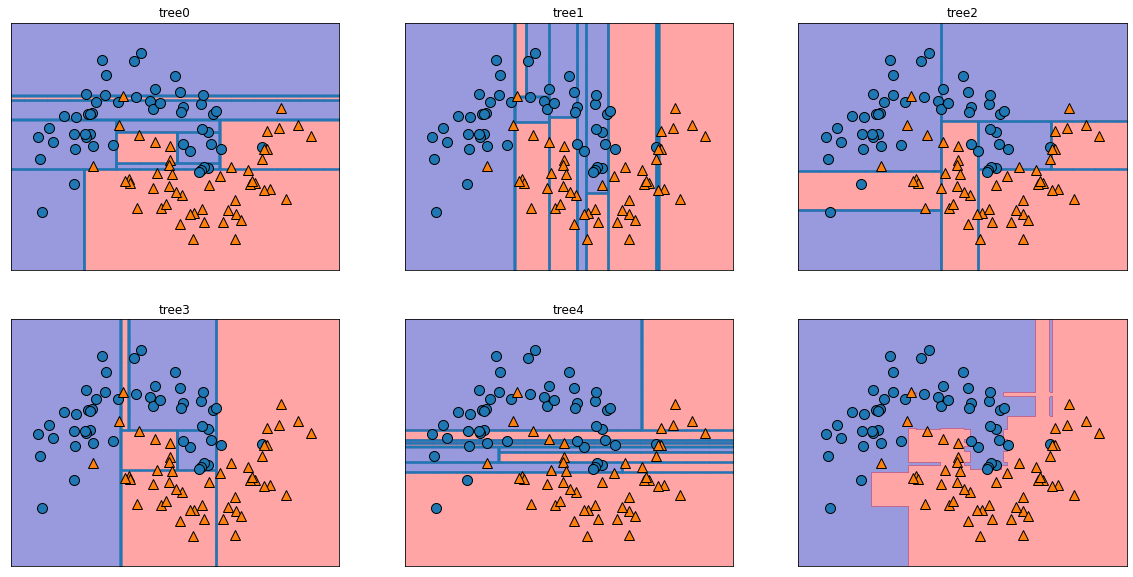

In [26]:
# 결정 경계 시각화
# 다섯 개의 결정트리 결정 경계
# ravel() 다차원 배열(array)을 1차원 배열로 평평하게 NumPy의 함수
# reshape() 함수와 반대의 기능을 하는 함수
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), model.estimators_)):
  ax.set_title(f'tree{i}')
  mglearn.plots.plot_tree_partition(X,y,tree, ax=ax)
# 랜덤포레스트로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X,fill =True, ax=axes[-1,-1], alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

- 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어줌
- 실제 애플리케이션에서는 매우 많은 트리를 사용하기 때문에(수백, 수천 개) 더 부드러운 결정 경계가 만들어짐

#### Random Forest 실습 01

- 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용

In [39]:
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, max_depth=4,max_features = 10, random_state=0).fit(X_train,y_train)

# 평가
model.score(X_train,y_train), model.score(X_test,y_test)


(0.9929577464788732, 0.986013986013986)

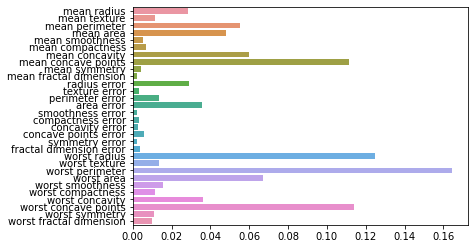

In [37]:
# 특성 중요도 시각화
import numpy as np
import seaborn as sns

sns.barplot(x = model.feature_importances_,y = cancer.feature_names)


#### Random Forest 실습 02

붓꽃 데이터 랜덤포레스트를 만들기

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)


(0.975, 0.9333333333333333)

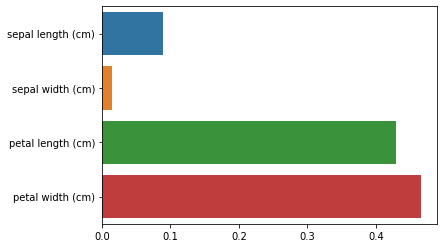

In [52]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x = model.feature_importances_,y = iris.feature_names)

##### 랜덤포레스트 성능향상

- iris 데이터가 간단하고 size가 작기 때문에 성능향상은 없으나 max_features와 oob_score를 적용해 보고 
- 특성 중요도의 변화를 확인해 본다.


oob_score

- 샘플링에 중복을 허용하는 배깅(Bagging) 방식을 사용하면 어떤 샘플은 여러번 샘플링되고 어떤 것은 전혀 선택되지 않을 수 있음
- 평균적으로 각 예측기에 훈련 샘플의 63% 정도만 샘플링
- oob(out-of-bag) : 선택되지 않은 훈련 샘플의 나머지 37% <br>
(예측기 마다 남겨진 37%는 모두 다름)
- oob_score=True로 지정하면 훈련이 끝난 후 자동으로 oob 샘플을 사용해 평가를 수행 

In [59]:
# 모델 학습
# 평가
# 결정함수는 각 훈련 샘플의 클래스 확률을 반환 
# 특성 중요도 시각화
model = RandomForestClassifier(n_estimators=10,random_state=0,
                              max_features=4,  oob_score=True)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9916666666666667, 0.9333333333333333)

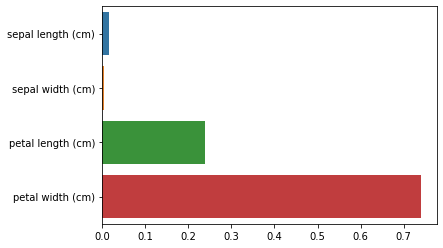

In [61]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x = model.feature_importances_,y = iris.feature_names)

#### 장단점

- 결정트리의 단점을 보완하고 장점은 그대로 가지고 있는 모델이어서 별다른 조정 없이도 괜찮을 결과를 만들어낸다.
- 트리가 여러 개 만들어지기 때문에 비전문가에게 예측과정을 보여주기는 어렵다.
- 랜덤하게 만들어지기 때문에 random_state를 고정해야 같은 결과를 볼 수 있다.
- 텍스트 데이터와 같은 희소한 데이터에는 잘 동작하지 않는다.
- 큰 데이터 세트에도 잘 동작하지만 훈련과 예측이 상대적으로 느리다.
- 트리 개수가 많아질 수록 시간이 더 오래 걸린다.
